# Simulate primary drying with known Kv and Rp


Since this documentation example is a Jupyter notebook, inside the LyoPRONTO file structure, it needs to be directed to the LyoPRONTO code, which means adding `../../` to `sys.path`.
However, this step will in general not be necessary.

In [1]:
# import sys
# sys.path.append('../../')

We need a few imports:

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc as matplotlibrc
from ruamel.yaml import YAML
yaml = YAML()

import lyopronto as lp

Then, we provide all the necessary simulation parameters.

In [3]:
# Set up the simulation settings
# This needs to be a dict with string keys, which can be expressed in YAML as well
sim = yaml.load("""
tool: Primary Drying Calculator
Kv_known: Y
Rp_known: Y
Variable_Pch: N
Variable_Tsh: N
""")
# Or, equivalently:
sim = {
    'tool':'Primary Drying Calculator',
    'Kv_known':'Y',
    'Rp_known':'Y',
    'Variable_Pch':'N',
    'Variable_Tsh':'N'}


# Vial and fill properties
vial = {
    # Av = Vial area in cm^2
    'Av': 3.80,
    # Ap = Product Area in cm^2
    'Ap': 3.14,
    # Vfill = Fill volume in mL
    'Vfill': 2.0
}

In [4]:

# Product properties
product = {
    # cSolid = Fractional concentration of solute in the frozen solution
    'cSolid': 0.05,
    # Product Resistance Parameters
    'R0': 1.4, # cm^2-hr-Torr/g
    'A1': 16.0, # cm-hr-Torr/g
    'A2': 0.0, # 1/cm
    # Critical product temperature
    # At least 2 to 3 deg C below collapse or glass transition temperature
    'T_pr_crit': - 5 # in deg C
}


In [5]:
# Vial Heat Transfer Parameters
ht = {
    'KC': 2.75e-4, # cal/s-cm^2-K
    'KP': 8.93e-4, # cal/s-cm^2-K-Torr
    'KD': 0.46     # 1/Torr
}

# Chamber Pressure
Pchamber = {
    # setpt = Chamber pressure set points in Torr
    'setpt': [0.15],
    # dt_setpt = Time for which chamber pressure set points are held in min
    'dt_setpt': [1800.0],
    # ramp_rate = Chamber pressure ramping rate in Torr/min
    'ramp_rate': 0.5
}

Tshelf = {
    # init = Intial shelf temperature in C
    'init': -35.0,
    # setpt = Shelf temperature set points in C
    'setpt': [20.0],
    # dt_setpt = Time for which shelf temperature set points are held in min
    'dt_setpt': [1800.0],
    # ramp_rate = Shelf temperature ramping rate in C/min
    'ramp_rate': 1.0
}

# Time step
dt = 0.01    # hr


Now, we are ready to actually run the simulation, which is `lyopronto.calc_knownRp.dry`.

??? info - documentation
    *Here is the docstring for `calc_knownRp.dry`:*
    ::: lyopronto.calc_knownRp.dry

In [6]:

output_table = lp.calc_knownRp.dry(vial,product,ht,Pchamber,Tshelf,dt)


It's a good idea, particularly when you are exploring interactively, to write the simulation input and output to disk together so that as you do later analysis, you have a record of what you did. Uncommenting the following code will do so.

Previously the inputs were recorded as a two-column CSV, which records info but isn't very readable (and frankly not very useful to a machine either). YAML provides a somewhat more sensible format, and fortunately a Python dictionary can be readily represented in YAML.

In [7]:
sim_setup = {
    'sim': sim,
    'vial': vial,
    'product': product,
    'ht': ht,
    'Pchamber': Pchamber,
    'Tshelf': Tshelf,
    'dt': dt,
}

# # Write input data to disk as YAML
# import time
# current_time = time.strftime("%Y%m%d_%H%M%S")
# try:
#     yamlfile = open('lyopronto_input_'+current_time+'.yaml', 'w')
#     yaml.dump(sim_setup, yamlfile)
# finally:
#     yamlfile.close()

# # Write simulation data to disk as CSV
# try:
#     csvfile = open('lyopronto_output_'+current_time+'.csv', 'w')
#     writer = csv.writer(csvfile)
#     writer.writerow(['Time [hr]','Sublimation Temperature [C]','Vial Bottom Temperature [C]', 'Shelf Temperature [C]','Chamber Pressure [mTorr]','Sublimation Flux [kg/hr/m^2]','Percent Dried'])
#     for i in range(0,len(output_table)):
#         writer.writerow(output_table[i])
# finally:
#     csvfile.close()

Finally, it's a good idea to plot everything. Here, again, you could save plots to disk by uncommenting the lines below.

Some default styling of the axes is carried out with `lyopronto.plot_styling.axis_style_*`, like turning on minor ticks and setting tick labels to be bold. However, this is entirely up to aesthetic taste and leaving it out does not affect the basic logic of the plots.

In [8]:

matplotlibrc('text.latex', preamble=r'\usepackage{color}')
matplotlibrc('text',usetex=False)
plt.rcParams['font.family'] = 'Arial'

figwidth = 30
figheight = 20
lineWidth = 5
markerSize = 20


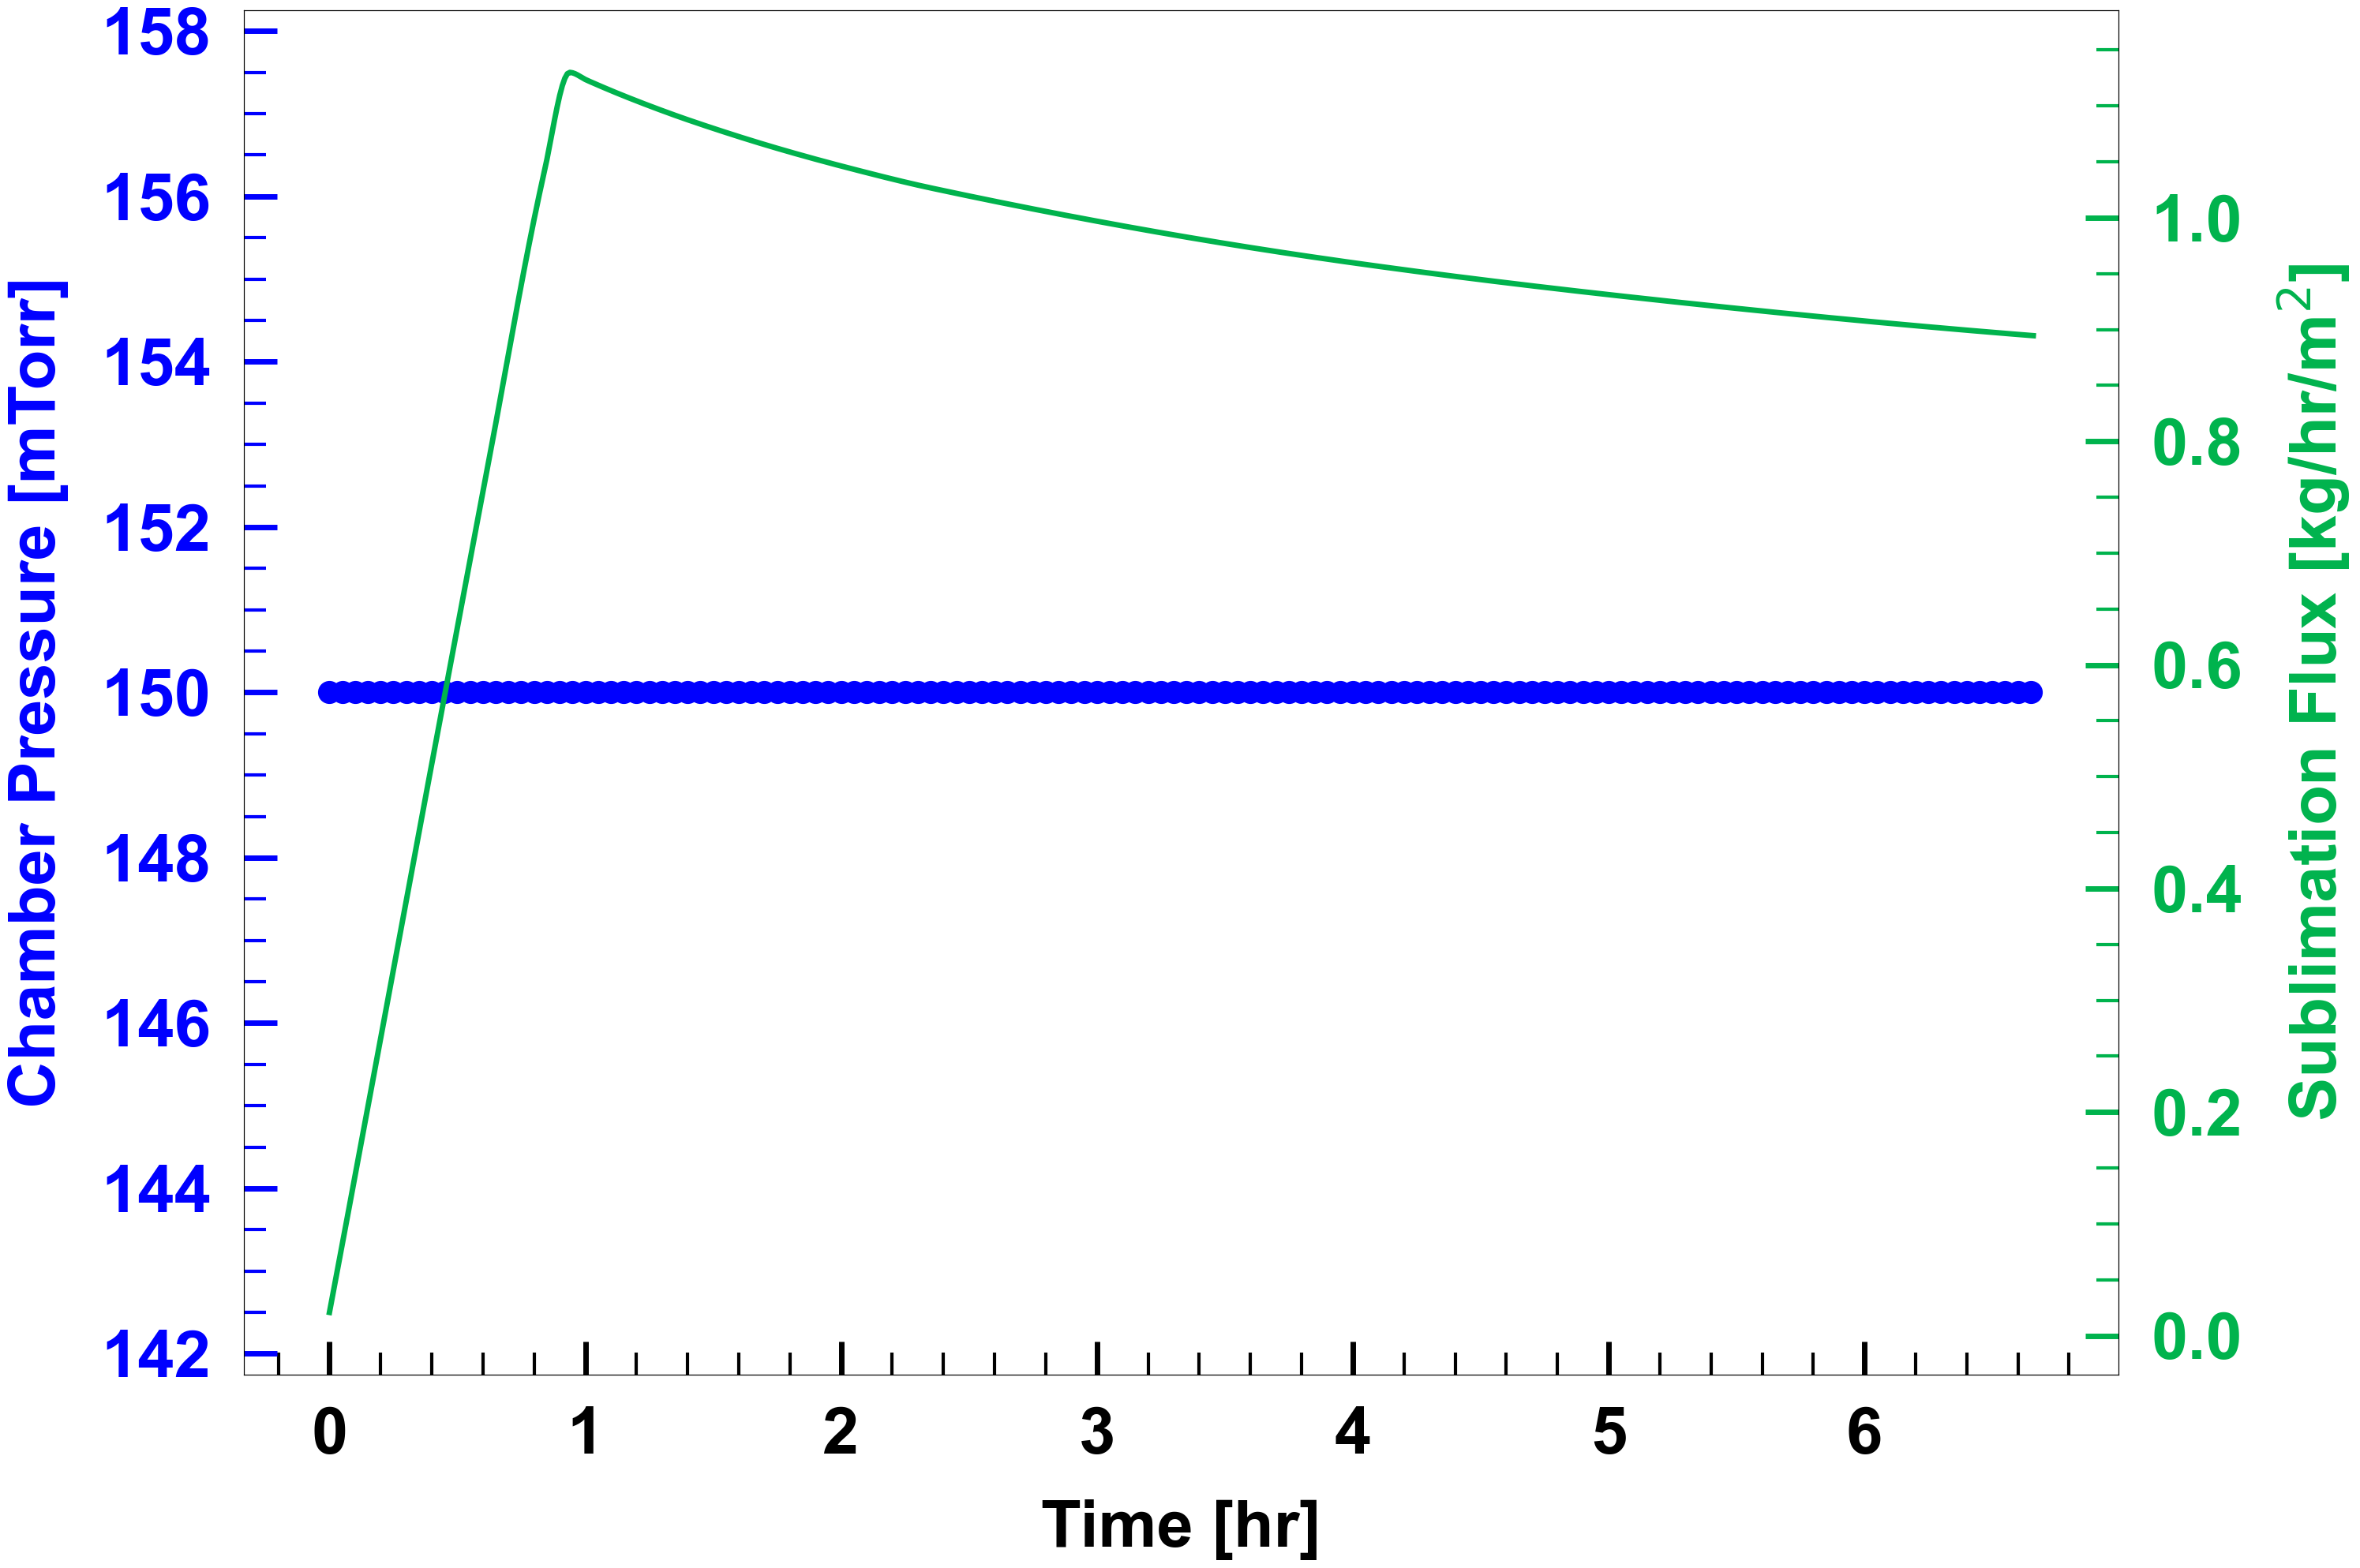

In [9]:

fig = plt.figure(0,figsize=(figwidth,figheight))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
ax1.plot(output_table[:,0],output_table[:,4],'-o',color='b',markevery=5,linewidth=lineWidth, markersize=markerSize, label = "Chamber Pressure")
ax2.plot(output_table[:,0],output_table[:,5],'-',color=[0,0.7,0.3],linewidth=lineWidth, label = "Sublimation Flux")

lp.plot_styling.axis_style_pressure(ax1)
lp.plot_styling.axis_style_subflux(ax2)

plt.tight_layout()
# figure_name = 'lyopronto_pressure_subflux_'+current_time+'.pdf'
# plt.savefig(figure_name)
# plt.close()


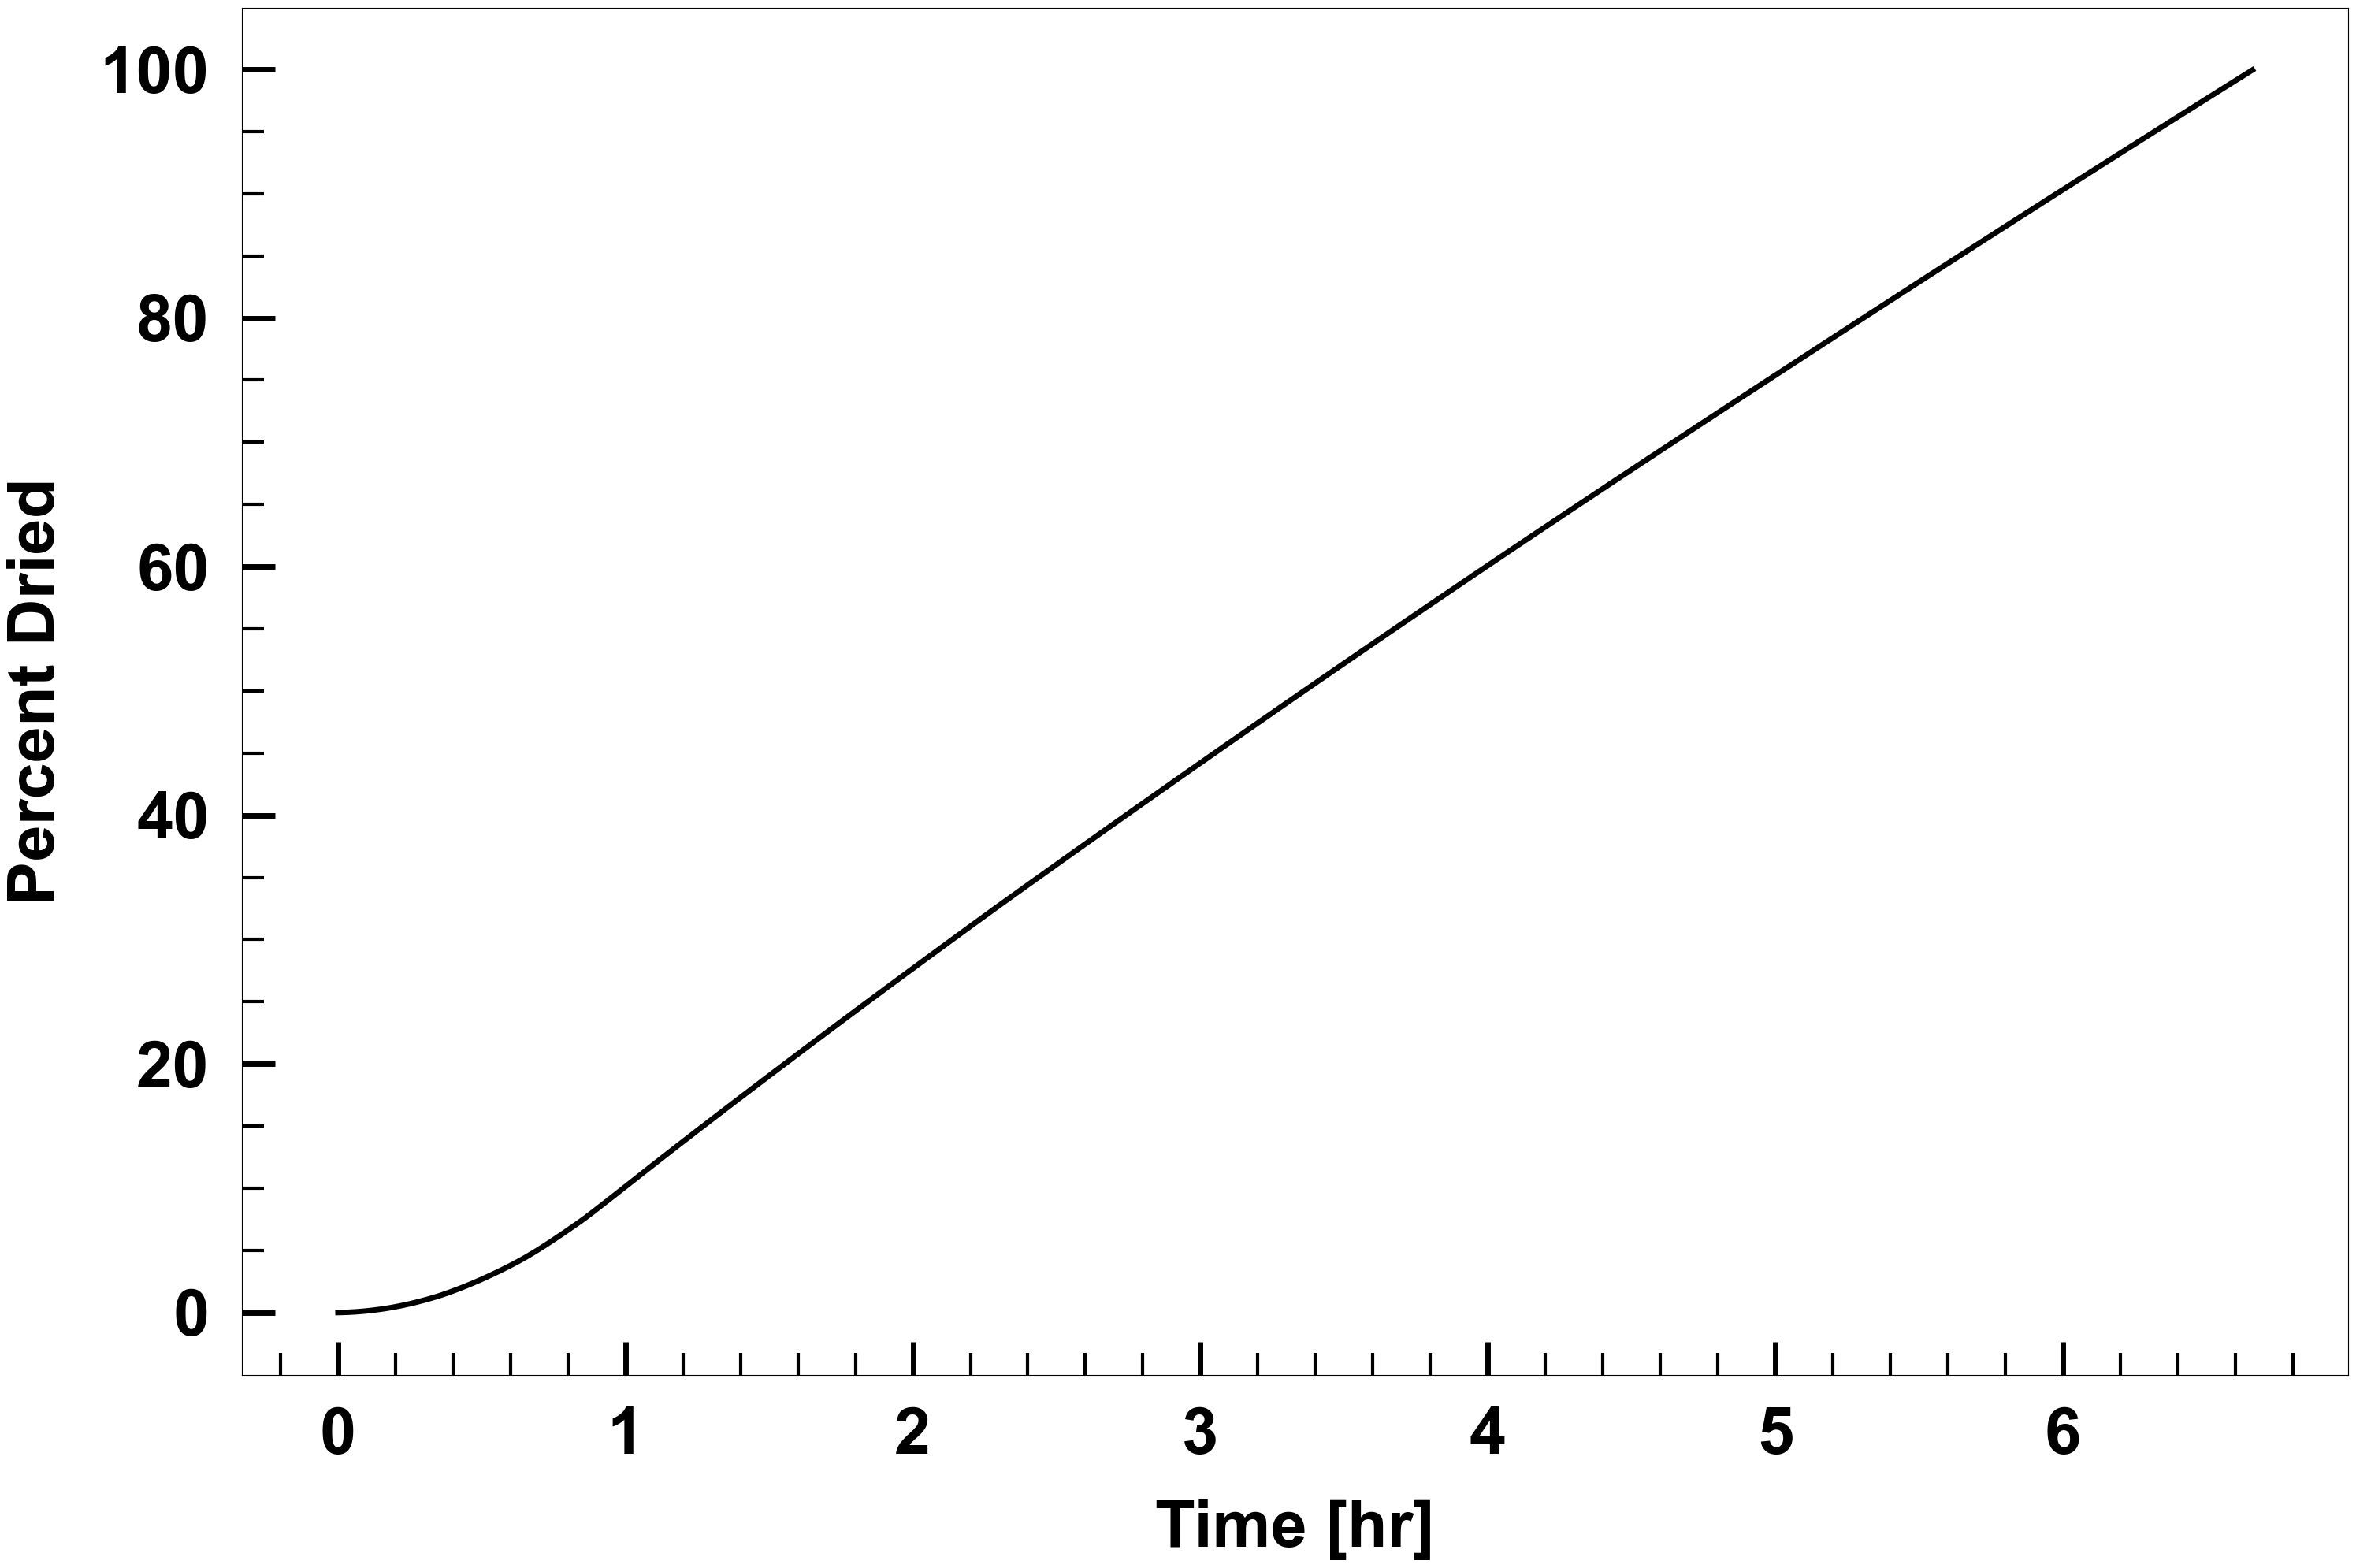

In [10]:

fig = plt.figure(0,figsize=(figwidth,figheight))
ax = fig.add_subplot(1,1,1)
lp.plot_styling.axis_style_percdried(ax)
ax.plot(output_table[:,0],output_table[:,-1],'-k',linewidth=lineWidth, label = "Percent Dried")
plt.tight_layout()
# figure_name = 'lyopronto_percentdried_'+current_time+'.pdf'
# plt.savefig(figure_name)
# plt.close()


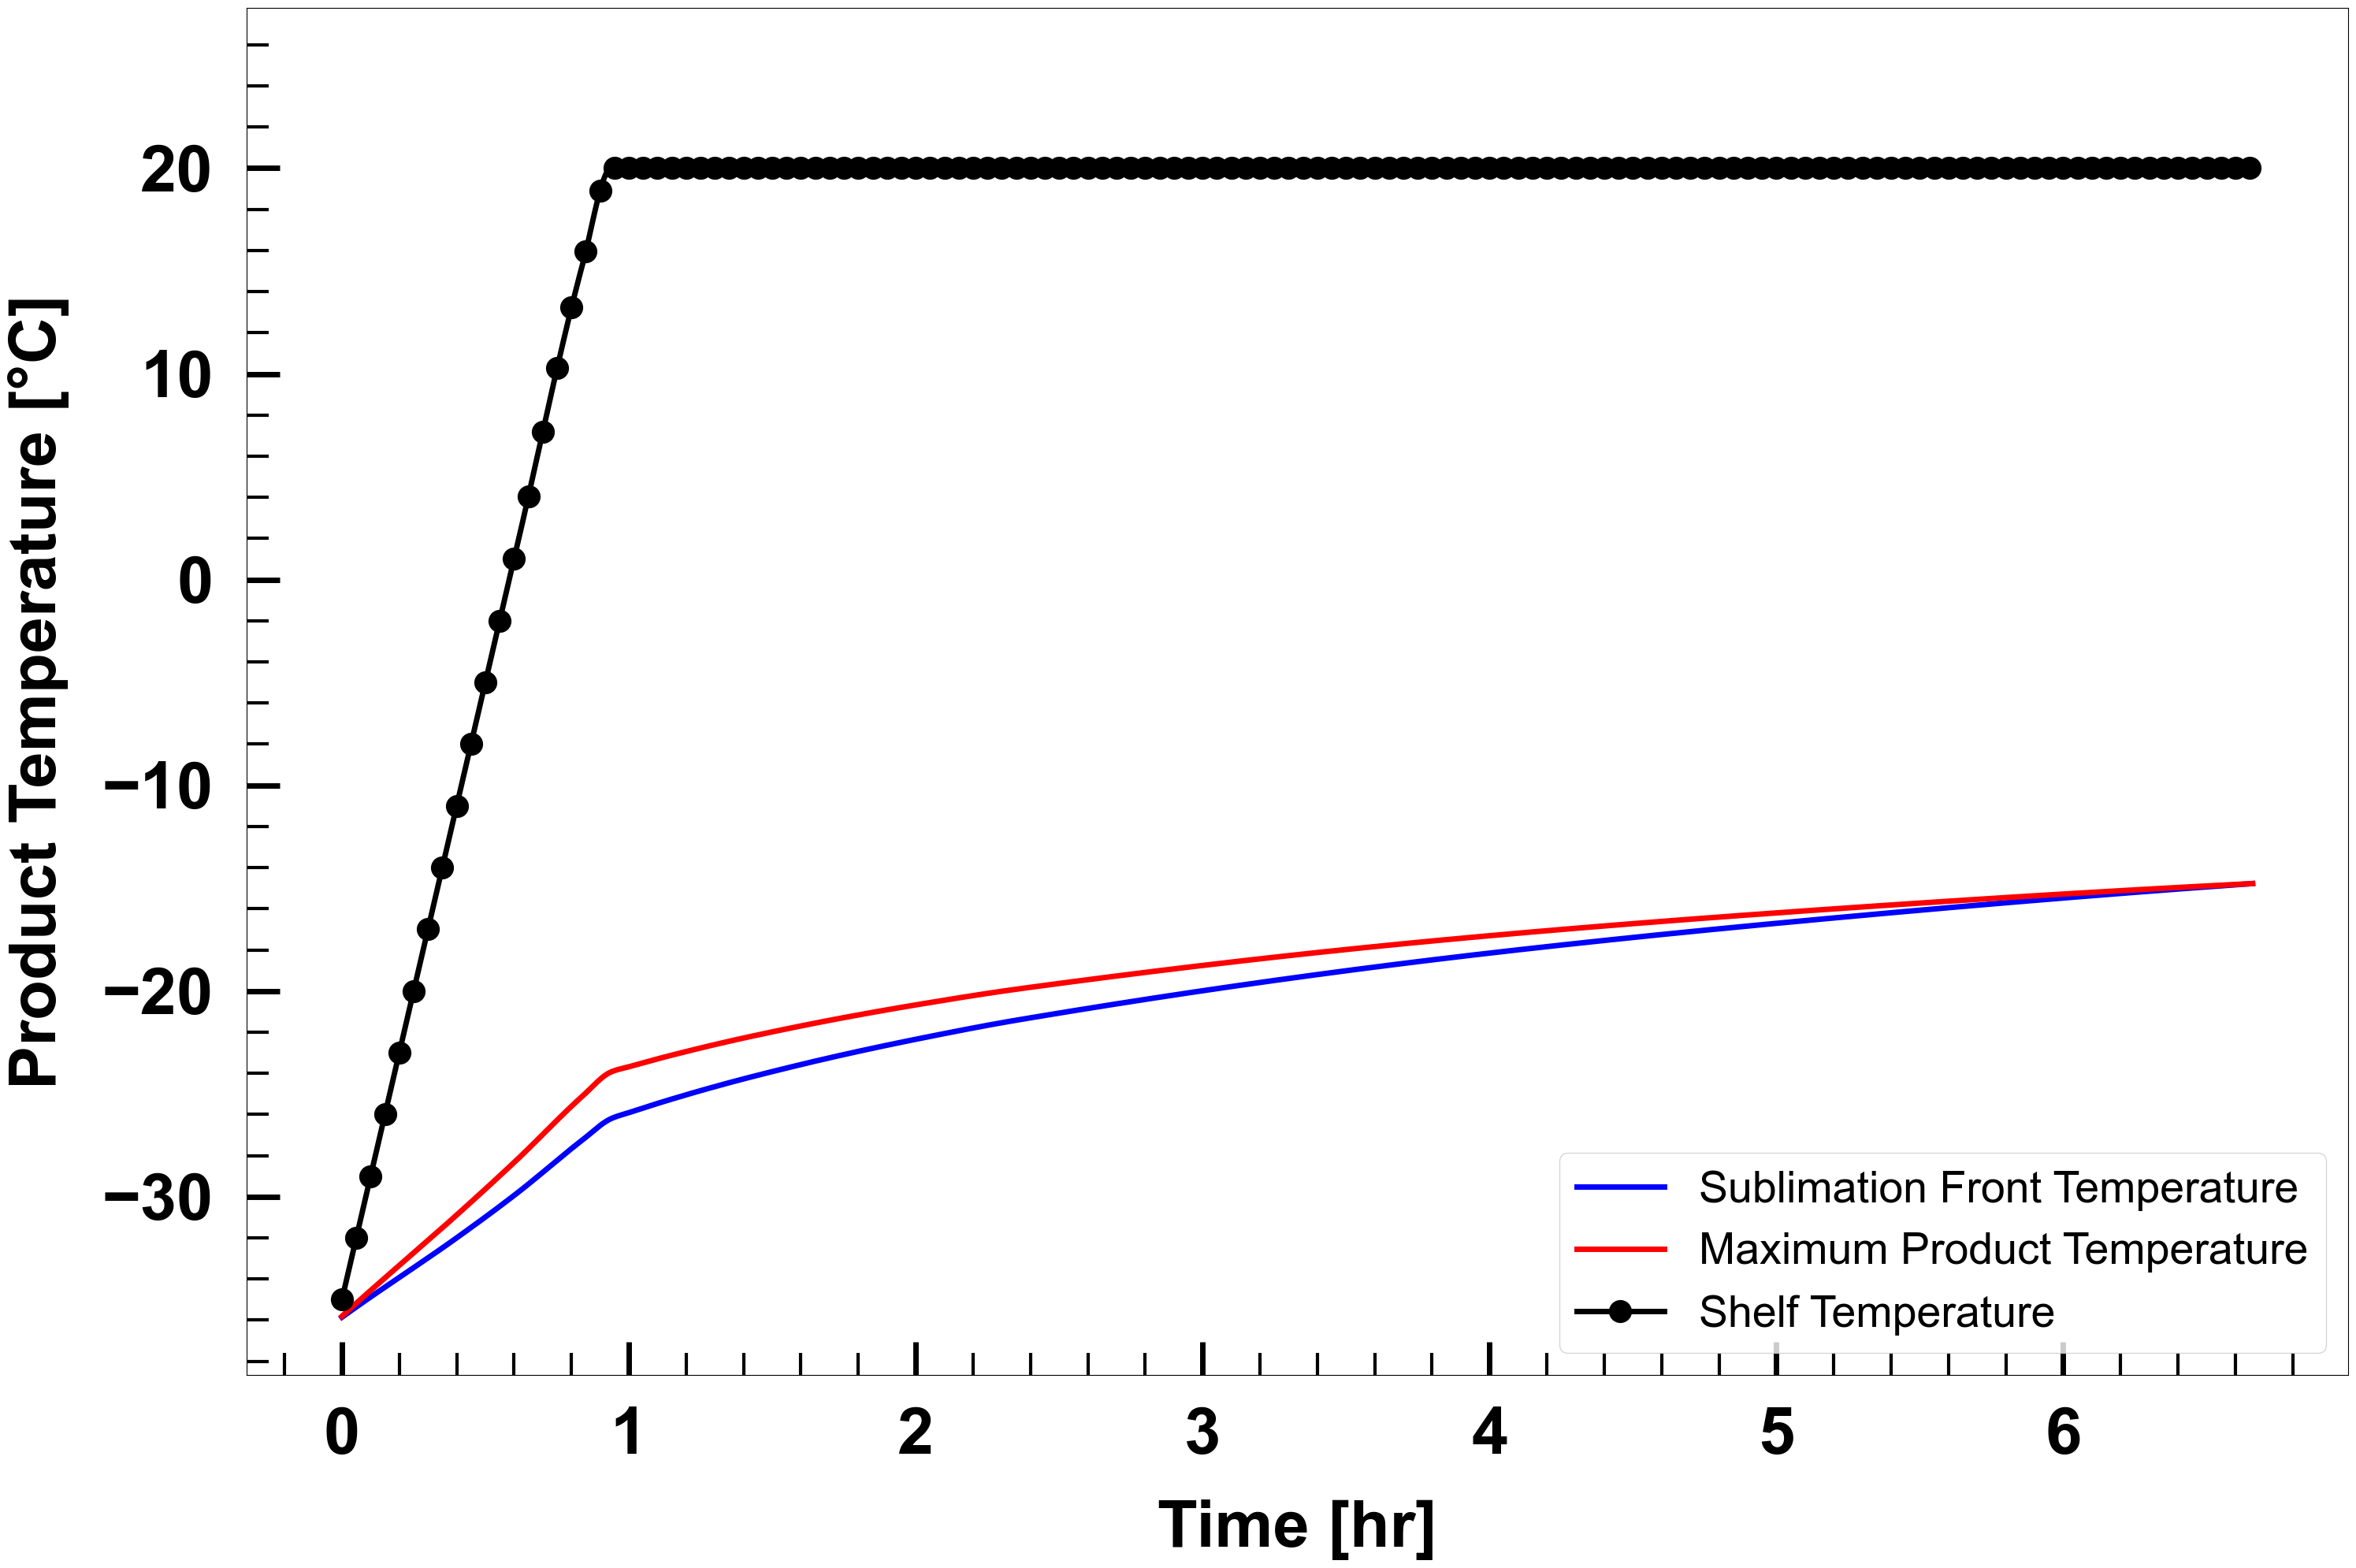

In [11]:

fig = plt.figure(0,figsize=(figwidth,figheight))
ax = fig.add_subplot(1,1,1)
lp.plot_styling.axis_style_temperature(ax)
ax.plot(output_table[:,0],output_table[:,1],'-b',linewidth=lineWidth, label = "Sublimation Front Temperature")
ax.plot(output_table[:,0],output_table[:,2],'-r',linewidth=lineWidth, label = "Maximum Product Temperature")
ax.plot(output_table[:,0],output_table[:,3],'-o',color='k',markevery=5,linewidth=lineWidth, markersize=markerSize, label = "Shelf Temperature")
plt.legend(fontsize=40,loc='best')
ll,ul = ax.get_ylim()
ax.set_ylim([ll,ul+5.0])
plt.tight_layout()
# figure_name = 'lyopronto_temperatures_'+current_time+'.pdf'
# plt.savefig(figure_name)
# plt.close()
